In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('cardata.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.shape

(301, 9)

In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
len(data.Car_Name.unique())

98

In [8]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [10]:
for column in data.columns:
    if data.dtypes[column] == np.object:
        data[column] = lb.fit_transform(data[column])

In [11]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [12]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
data.corr()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,0.017265,0.499198,0.475539,0.064453,-0.371446,-0.829718,-0.059855,-0.081192
Year,0.017265,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.499198,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,0.475539,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,0.064453,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.371446,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,-0.829718,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,-0.059855,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.081192,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


In [14]:
import datetime
now = datetime.datetime.now()
now

datetime.datetime(2020, 7, 20, 19, 48, 9, 162975)

In [15]:
data['Current_Year'] = now.year
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,90,2014,3.35,5.59,27000,2,0,1,0,2020
1,93,2013,4.75,9.54,43000,1,0,1,0,2020
2,68,2017,7.25,9.85,6900,2,0,1,0,2020
3,96,2011,2.85,4.15,5200,2,0,1,0,2020
4,92,2014,4.60,6.87,42450,1,0,1,0,2020


In [16]:
# We are going to substract Current_Year and Year feature
# By this way we get information about how old the car is
data['NO_Of_Years'] = data['Current_Year'] - data['Year']

In [17]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,NO_Of_Years
0,90,2014,3.35,5.59,27000,2,0,1,0,2020,6
1,93,2013,4.75,9.54,43000,1,0,1,0,2020,7
2,68,2017,7.25,9.85,6900,2,0,1,0,2020,3
3,96,2011,2.85,4.15,5200,2,0,1,0,2020,9
4,92,2014,4.60,6.87,42450,1,0,1,0,2020,6


In [18]:
# Now we don't required the Current_Year and Year feature so we drop it
data.drop(['Year', 'Current_Year'], axis=1, inplace=True)

In [19]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NO_Of_Years
0,90,3.35,5.59,27000,2,0,1,0,6
1,93,4.75,9.54,43000,1,0,1,0,7
2,68,7.25,9.85,6900,2,0,1,0,3
3,96,2.85,4.15,5200,2,0,1,0,9
4,92,4.60,6.87,42450,1,0,1,0,6


In [20]:
data.corr()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NO_Of_Years
Car_Name,1.000000,0.499198,0.475539,0.064453,-0.371446,-0.829718,-0.059855,-0.081192,-0.017265
Selling_Price,0.499198,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344,-0.236141
Present_Price,0.475539,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057,0.047584
Kms_Driven,0.064453,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216,0.524342
Fuel_Type,-0.371446,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705,0.053643
Seller_Type,-0.829718,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269,0.039896
Transmission,-0.059855,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316,-0.000394
Owner,-0.081192,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000,0.182104
NO_Of_Years,-0.017265,-0.236141,0.047584,0.524342,0.053643,0.039896,-0.000394,0.182104,1.000000


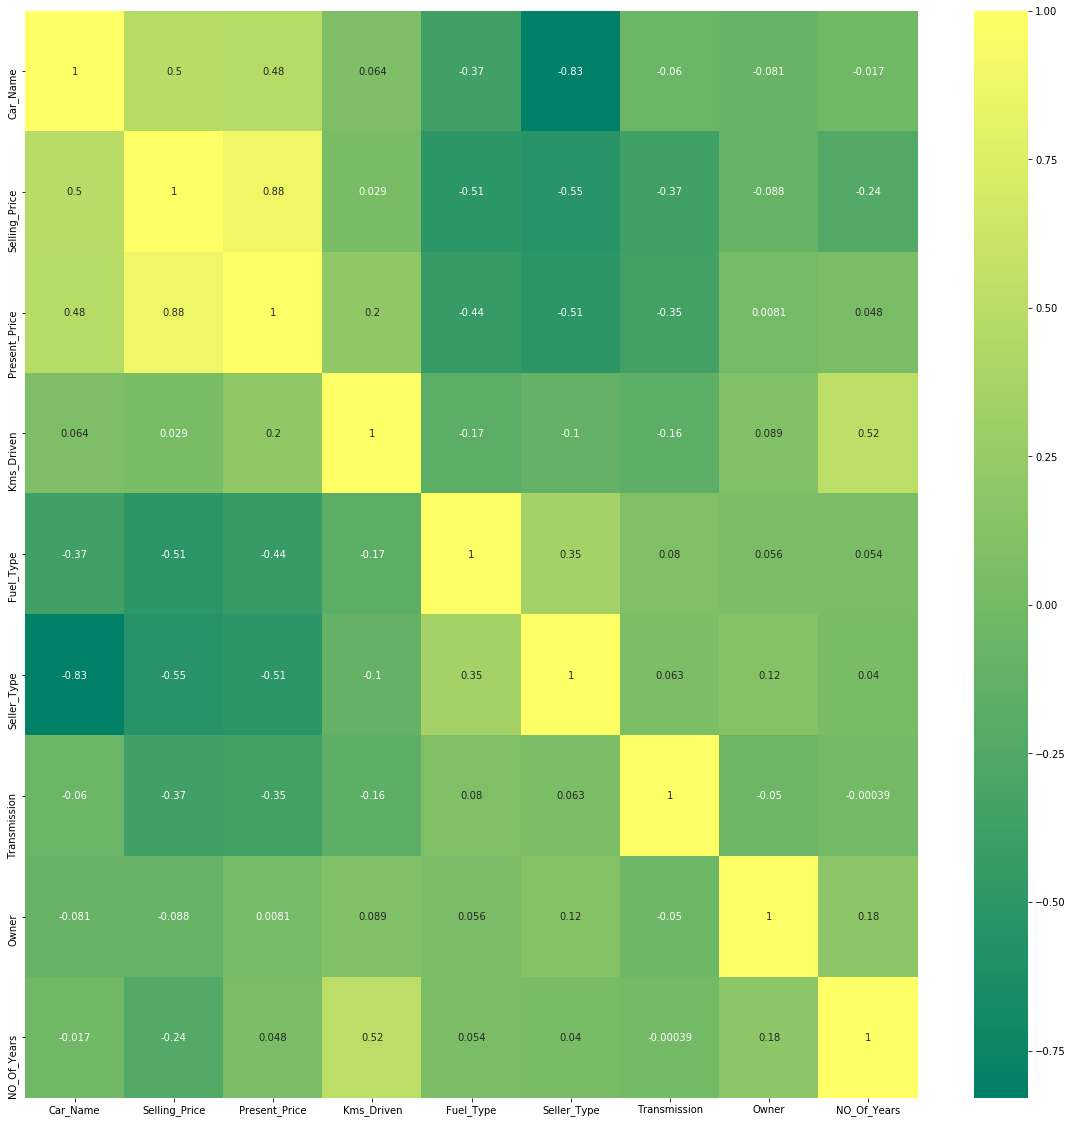

In [21]:
corrmat = data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20)) 
correlation_matrix = sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap="summer")

In [22]:
X = data.drop('Selling_Price', axis=1)
X.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NO_Of_Years
0,90,5.59,27000,2,0,1,0,6
1,93,9.54,43000,1,0,1,0,7
2,68,9.85,6900,2,0,1,0,3
3,96,4.15,5200,2,0,1,0,9
4,92,6.87,42450,1,0,1,0,6


In [23]:
Y = data.Selling_Price
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
model_rf = RandomForestRegressor(n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_depth=12, random_state=42)
model_rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=900, random_state=42)

In [27]:
model_rf.score(X_test, Y_test)

0.9379096450546209

In [28]:
test_pred_rf = model_rf.predict(X_test)

In [29]:
r2_rf = r2_score(Y_test, test_pred_rf)
print('r2 score for model is', r2_rf)

r2 score for model is 0.9379096450546209


In [30]:
## Now we are going to calculate Mean Squared Error
## MSE is nothing but your loss function. It is used to compare different estimators by comparing the value of MSE of them.
## Or also called as variance, which gives you intuition of the best fit estimate.
## Lesser the MSE => smaller is the error => better the estimator.

In [31]:
mse_test = mean_squared_error(Y_test, test_pred_rf)
rmse_test = np.sqrt(mse_test)

In [32]:
# A larger MSE means that the data values are dispersed widely around its central moment (mean), and 
# A smaller MSE means otherwise and it is definitely the preferred and/or desired choice as it shows 
# that your data values are dispersed closely to its central moment (mean)

In [33]:
print(f'Mean Squared Error of Test Set : {mse_test}')
print(f'Root Mean Square Error of Test Set : {rmse_test}')

Mean Squared Error of Test Set : 1.4302876192391005
Root Mean Square Error of Test Set : 1.195946327909033


In [34]:
train_pred_rf = model_rf.predict(X_train)

In [35]:
mse_train = mean_squared_error(Y_train, train_pred_rf)
rmse_train = np.sqrt(mse_train)

In [36]:
print(f'Mean Squared Error of Train Set : {mse_train}')
print(f'Root Mean Square Error of Train Set : {rmse_train}')

Mean Squared Error of Train Set : 2.0953993395402386
Root Mean Square Error of Train Set : 1.4475494255949393


## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model_lr = LinearRegression().fit(X_train, Y_train)

In [39]:
model_lr.score(X_test, Y_test)

0.8465539666863953

In [40]:
test_pred_lr = model_lr.predict(X_test)

In [41]:
r2_lr = r2_score(Y_test, test_pred_lr)
print('r2 score for model is', r2_lr)

r2 score for model is 0.8465539666863953


In [42]:
mse_test = mean_squared_error(Y_test, test_pred_lr)
rmse_test = np.sqrt(mse_test)

In [43]:
print(f'Mean Squared Error of Test Set : {mse_test}')
print(f'Root Mean Square Error of Test Set : {rmse_test}')

Mean Squared Error of Test Set : 3.534719069698816
Root Mean Square Error of Test Set : 1.8800848570473663


In [44]:
train_pred_lr = model_lr.predict(X_train)

In [45]:
mse_train = mean_squared_error(Y_train, train_pred_lr)
rmse_train = np.sqrt(mse_train)

In [46]:
print(f'Mean Squared Error of Train Set : {mse_train}')
print(f'Root Mean Square Error of Train Set : {rmse_train}')

Mean Squared Error of Train Set : 3.0650315291899592
Root Mean Square Error of Train Set : 1.7507231446433669


## Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
model_dc = DecisionTreeRegressor(min_samples_split=15, min_samples_leaf=2, max_depth=8, random_state=42, max_features='auto')
model_dc.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                      min_samples_split=15, random_state=42)

In [49]:
model_dc.score(X_test, Y_test)

0.9656013542924112

In [50]:
test_pred_dc = model_dc.predict(X_test)
mse_test = mean_squared_error(Y_test, test_pred_dc)
rmse_test = np.sqrt(mse_test)

In [51]:
r2_dc = r2_score(Y_test, test_pred_dc)
print('r2 score for model is', r2_dc)

r2 score for model is 0.9656013542924112


In [52]:
print(f'Mean Squared Error of Test Set : {mse_test}')
print(f'Root Mean Square Error of Test Set : {rmse_test}')

Mean Squared Error of Test Set : 0.7923929105806802
Root Mean Square Error of Test Set : 0.8901645412959787


In [53]:
train_pred_dc = model_dc.predict(X_train)
mse_train = mean_squared_error(Y_train, train_pred_dc)
rmse_train = np.sqrt(mse_train)

In [54]:
print(f'Mean Squared Error of Train Set : {mse_train}')
print(f'Root Mean Square Error of Train Set : {rmse_train}')

Mean Squared Error of Train Set : 2.4109737241959426
Root Mean Square Error of Train Set : 1.5527310534010526


## AdaBoost Regressor

In [55]:
from sklearn.ensemble import AdaBoostRegressor

In [56]:
model_ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=16), n_estimators=900, learning_rate=1.0)
model_ada.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=16),
                  n_estimators=900)

In [57]:
model_ada.score(X_test, Y_test)

0.9610460126131346

In [58]:
test_pred_ada = model_ada.predict(X_test)
mse_test = mean_squared_error(Y_test, test_pred_ada)
rmse_test = np.sqrt(mse_test)

In [59]:
r2_ada = r2_score(Y_test, test_pred_ada)
print('r2 score for model is', r2_ada)

r2 score for model is 0.9610460126131346


In [60]:
print(f'Mean Squared Error of Test Set : {mse_test}')
print(f'Root Mean Square Error of Test Set : {rmse_test}')

Mean Squared Error of Test Set : 0.8973278688524593
Root Mean Square Error of Test Set : 0.9472739143734822


In [61]:
train_pred_ada = model_ada.predict(X_train)
mse_train = mean_squared_error(Y_train, train_pred_ada)
rmse_train = np.sqrt(mse_train)

In [62]:
print(f'Mean Squared Error of Train Set : {mse_train}')
print(f'Root Mean Square Error of Train Set : {rmse_train}')

Mean Squared Error of Train Set : 0.013047916666666663
Root Mean Square Error of Train Set : 0.11422747772172273


## Gradient Boosting Regressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
model_gb = GradientBoostingRegressor(min_samples_split=12, max_features='auto', min_samples_leaf=2, max_depth=8, random_state=42, n_estimators=1200, learning_rate=0.1)
model_gb.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                          min_samples_split=12, n_estimators=1200,
                          random_state=42)

In [65]:
model_gb.score(X_test, Y_test)

0.9705768741434365

In [66]:
test_pred_gb = model_gb.predict(X_test)
mse_test = mean_squared_error(Y_test, test_pred_gb)
rmse_test = np.sqrt(mse_test)

In [67]:
r2_gb = r2_score(Y_test, test_pred_gb)
print('r2 score for model is', r2_gb)

r2 score for model is 0.9705768741434365


In [68]:
print(f'Mean Squared Error of Test Set : {mse_test}')
print(f'Root Mean Square Error of Test Set : {rmse_test}')

Mean Squared Error of Test Set : 0.6777789025200055
Root Mean Square Error of Test Set : 0.8232732854405064


In [69]:
train_pred_gb = model_gb.predict(X_train)
mse_train = mean_squared_error(Y_train, train_pred_gb)
rmse_train = np.sqrt(mse_train)

In [70]:
print(f'Mean Squared Error of Train Set : {mse_train}')
print(f'Root Mean Square Error of Train Set : {rmse_train}')

Mean Squared Error of Train Set : 1.0693825691034474e-10
Root Mean Square Error of Train Set : 1.0341095537240953e-05


## XGBoost Regressor

In [71]:
import xgboost as xgb

In [72]:
model_xgb = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.6, learning_rate = 1, max_depth = 18, alpha = 16, subsample=1, 
                             n_estimators = 1600, n_jobs=-1, gamma=3, colsample_bylevel=0.6, reg_lambda=1)

In [73]:
model_xgb.fit(X_train, Y_train)

[19:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=16, base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
             colsample_bynode=1, colsample_bytree=0.6, gamma=3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=18,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1600, n_jobs=-1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=16, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [74]:
model_xgb.score(X_test, Y_test)

0.9357718750302633

In [75]:
test_pred_xgb = model_xgb.predict(X_test)
mse_test = mean_squared_error(Y_test, test_pred_xgb)
rmse_test = np.sqrt(mse_test)

In [76]:
r2_xgb = r2_score(Y_test, test_pred_xgb)
print('r2 score for model is', r2_xgb)

r2 score for model is 0.9357718750302633


In [77]:
print(f'Mean Squared Error of Test Set : {mse_test}')
print(f'Root Mean Square Error of Test Set : {rmse_test}')

Mean Squared Error of Test Set : 1.479532401320136
Root Mean Square Error of Test Set : 1.21636030900393


In [78]:
train_pred_xgb = model_xgb.predict(X_train)
mse_train = mean_squared_error(Y_train, train_pred_xgb)
rmse_train = np.sqrt(mse_train)

In [79]:
print(f'Mean Squared Error of Train Set : {mse_train}')
print(f'Root Mean Square Error of Train Set : {rmse_train}')

Mean Squared Error of Train Set : 2.1651069088614068
Root Mean Square Error of Train Set : 1.4714302256177174
